In [3]:
import numpy as np
import pandas as pd
import scipy as scp
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams 
import warnings
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", color_codes=True)
rcParams['figure.figsize'] = 16,8

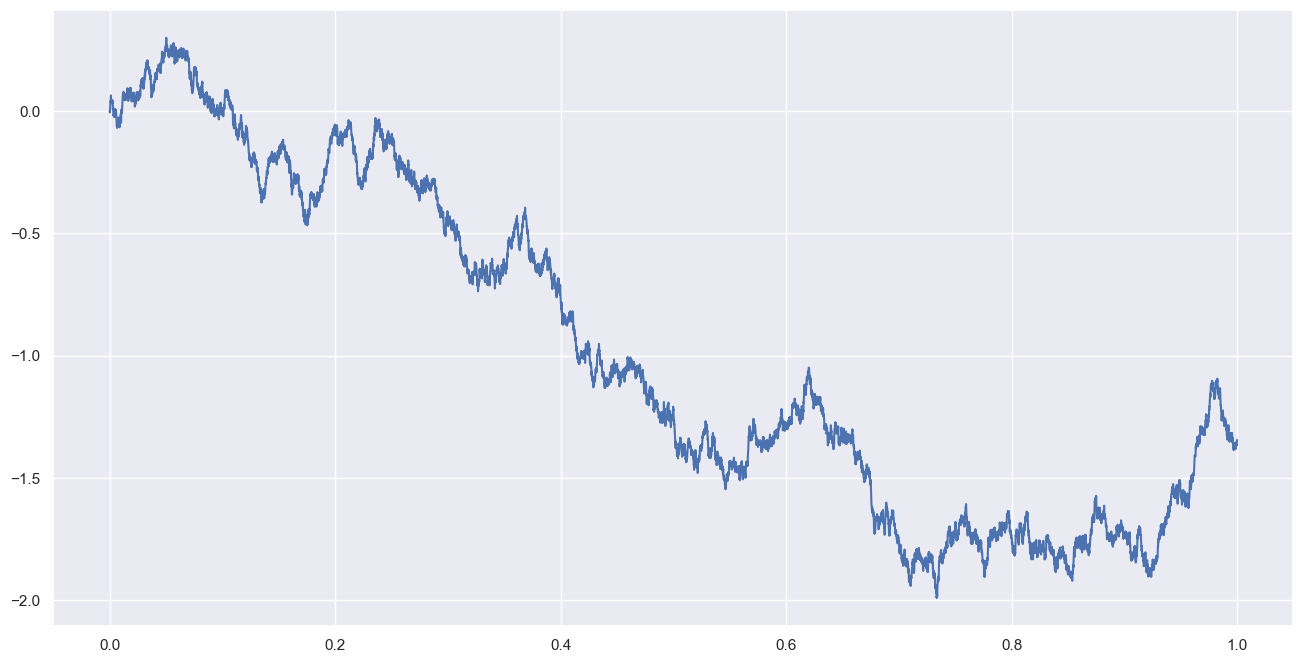

<Figure size 1600x800 with 0 Axes>

In [4]:
def brownian_motion():
    n = 10000
    d = 1
    T = 1.
    times = np.linspace(0., T, n)
    dt = times[1] - times[0]
    # Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
    dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
    B0 = np.zeros(shape=(1, d))
    B = np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
    plt.plot(times, B)
    # plt.plot(times, quadratic_variation(B))
    plt.show()
    plt.tight_layout()

brownian_motion()

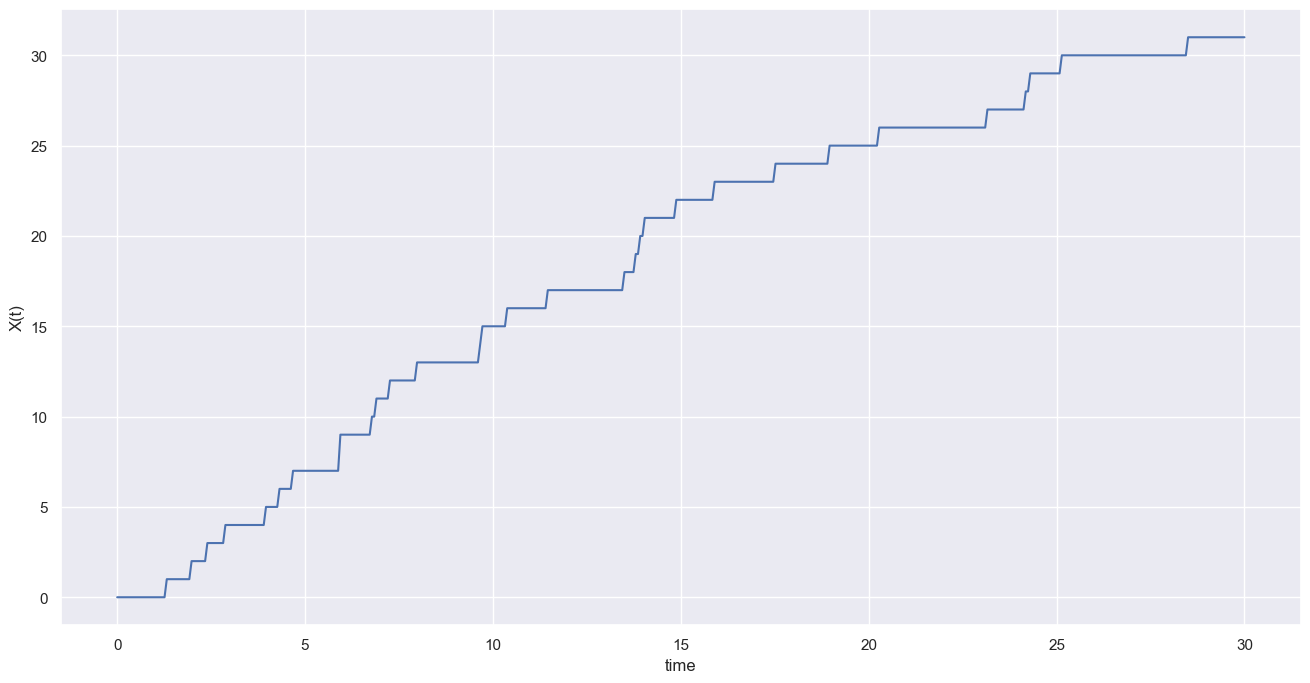

In [5]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,lam):
    # Create empty matrices for Poisson
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
    dt = T / float(NoOfSteps)
    Z = np.random.poisson(lam*dt,[NoOfPaths,NoOfSteps])
    for i in range(0,NoOfSteps):
    # Making sure that samples from a normal have mean 0 and variance 1
        X[:,i+1] = X[:,i] + Z[:,i]
        time[i+1] = time[i] +dt
    paths = {"time":time,"X":X}
    return paths
def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 30
    lam= 1
    
    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,lam)
    timeGrid = Paths["time"]
    X = Paths["X"]
    plt.figure()
    plt.plot(timeGrid, np.transpose(X),'-b')
    plt.xlabel("time")
    plt.ylabel("X(t)")

mainCalculation()

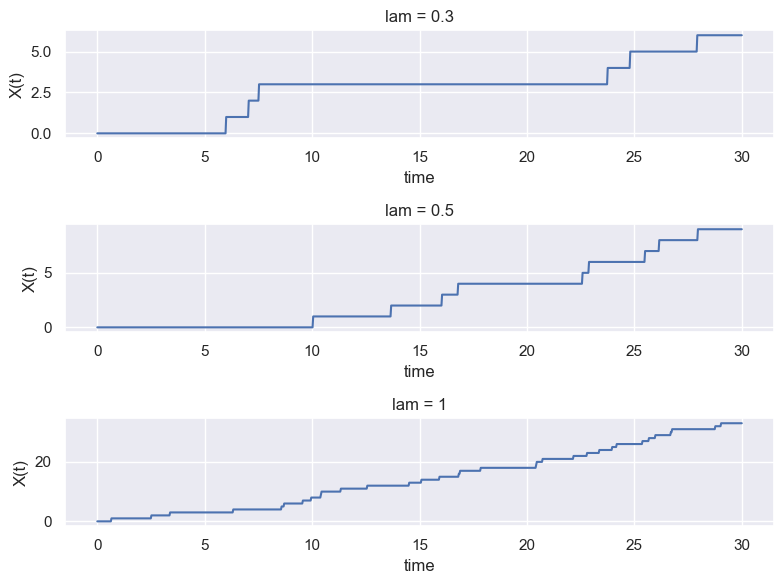

In [6]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,lam):
    # Create empty matrices for Poisson
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
    dt = T / float(NoOfSteps)
    Z = np.random.poisson(lam*dt,[NoOfPaths,NoOfSteps])
    for i in range(0,NoOfSteps):
    # Making sure that samples from a normal have mean 0 and variance 1
        X[:,i+1] = X[:,i] + Z[:,i]
        time[i+1] = time[i] +dt
    paths = {"time":time,"X":X}
    return paths

def mainCalculation():
    NoOfPaths = 1
    NoOfSteps = 1000
    T = 30
    lam_values = [0.3,0.5,1]
    
    fig, axs = plt.subplots(nrows=len(lam_values), ncols=1, figsize=(8, 6))
    
    for i, lam in enumerate(lam_values):
        Paths = GeneratePathsPoisson(NoOfPaths, NoOfSteps, T, lam)
        timeGrid = Paths["time"]
        X = Paths["X"]
        axs[i].plot(timeGrid, np.transpose(X), '-b')
        axs[i].set_xlabel("time")
        axs[i].set_ylabel("X(t)")
        axs[i].set_title(f"lam = {lam}")
    
    plt.tight_layout()
    plt.show()

mainCalculation()


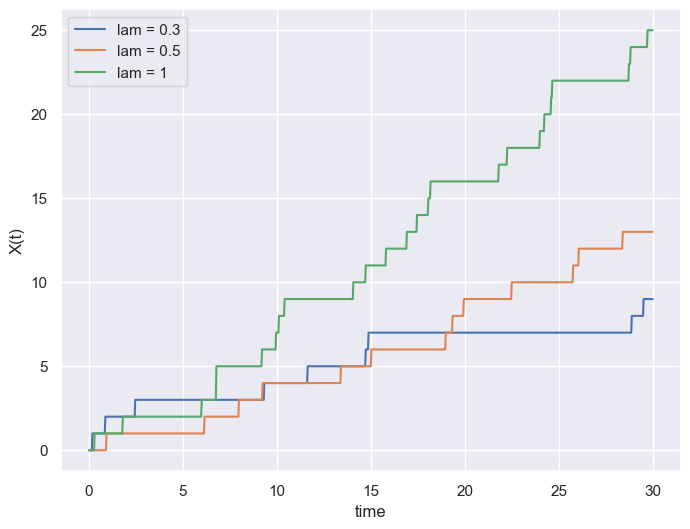

In [8]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,lam):
    # Create empty matrices for Poisson
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
    dt = T / float(NoOfSteps)
    Z = np.random.poisson(lam*dt,[NoOfPaths,NoOfSteps])
    for i in range(0,NoOfSteps):
    # Making sure that samples from a normal have mean 0 and variance 1
        X[:,i+1] = X[:,i] + Z[:,i]
        time[i+1] = time[i] +dt
    paths = {"time":time,"X":X}
    return paths
def mainCalculation():
    NoOfPaths = 1  # Set number of paths to 3
    NoOfSteps = 1000
    T = 30
    lam_values = [0.3, 0.5, 1]
    
    plt.figure(figsize=(8, 6))
    
    for lam in lam_values:
        Paths = GeneratePathsPoisson(NoOfPaths, NoOfSteps, T, lam)
        timeGrid = Paths["time"]
        X = Paths["X"]
        plt.plot(timeGrid, np.transpose(X), label=f"lam = {lam}")
        
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.legend()
    plt.show()

mainCalculation()

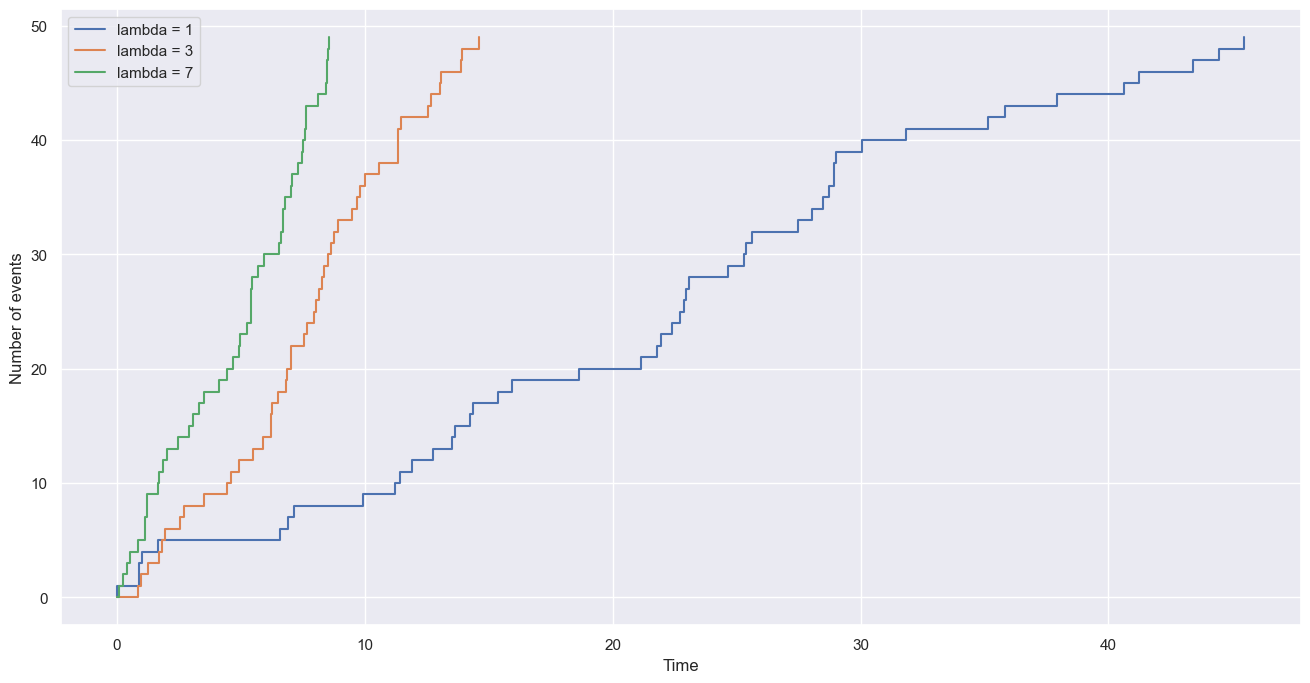

In [9]:
# Define the parameters of the Poisson process
lambdas = [1, 3, 7]
T = 50
dt = 1
N = int(T / dt)

# Generate a sequence of random uniform samples
u = np.random.uniform(0, 1, (len(lambdas), N))

# Initialize the solution arrays
t = np.zeros((len(lambdas), N))
n = np.zeros((len(lambdas), N), dtype=int)

# Implement the Poisson process for each lambda value
for i, lam in enumerate(lambdas):
    t[i][0] = 0
    n[i][0] = 0
    for j in range(1, N):
        t[i][j] = t[i][j-1] + (-1.0 / lam) * np.log(u[i][j-1])
        n[i][j] = n[i][j-1] + (t[i][j] < T)

# Plot the solutions
for i, lam in enumerate(lambdas):
    plt.step(t[i], n[i], where='post', label='lambda = ' + str(lam))
plt.xlabel('Time')
plt.ylabel('Number of events')
plt.legend()
plt.show()


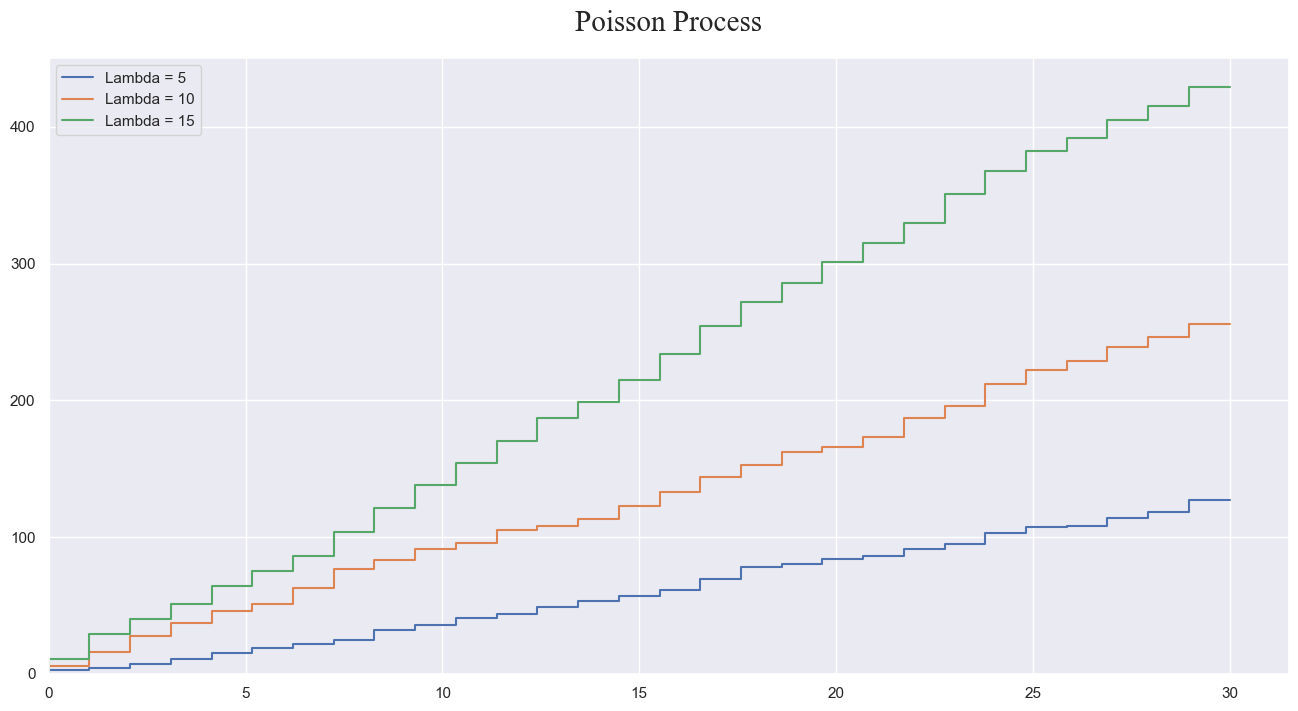

In [10]:
# Prepare data
N = 30 # step
lambdas = [5,10,15]
X_T = [np.random.poisson(lam, size=N) for lam in lambdas]
S = [[np.sum(X[0:i]) for i in range(N)] for X in X_T]
X = np.linspace(0, N, N)
 
# Plot the graph
graphs = [plt.step(X, S[i], label="Lambda = %d"%lambdas[i])[0] for i in range(len(lambdas))]
plt.legend(handles=graphs, loc=2)
plt.title("Poisson Process", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
plt.ylim(0)
plt.xlim(0)
plt.show()

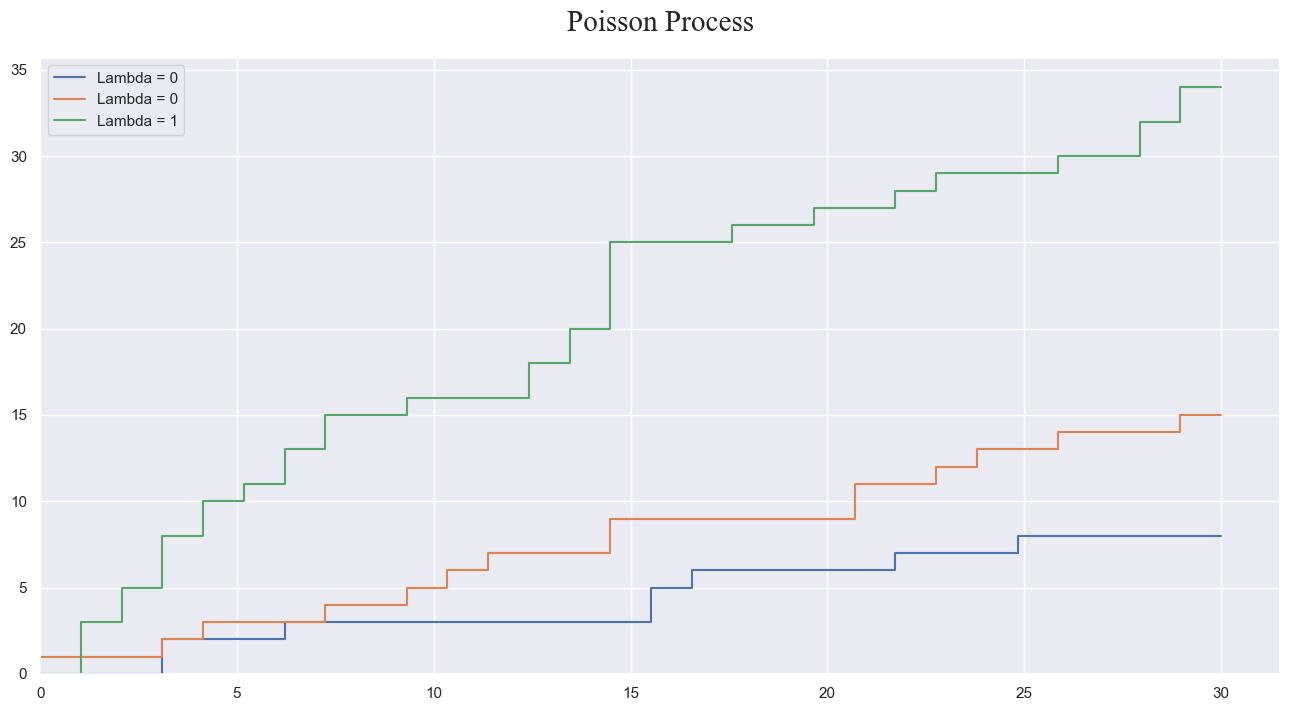

In [11]:
# Prepare data
N = 30 # step
lambdas = [0.2,0.5,1]
X_T = [np.random.poisson(lam, size=N) for lam in lambdas]
S = [[np.sum(X[0:i]) for i in range(N)] for X in X_T]
X = np.linspace(0, N, N)
 
# Plot the graph
graphs = [plt.step(X, S[i], label="Lambda = %d"%lambdas[i])[0] for i in range(len(lambdas))]
plt.legend(handles=graphs, loc=2)
plt.title("Poisson Process", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
plt.ylim(0)
plt.xlim(0)
plt.show()

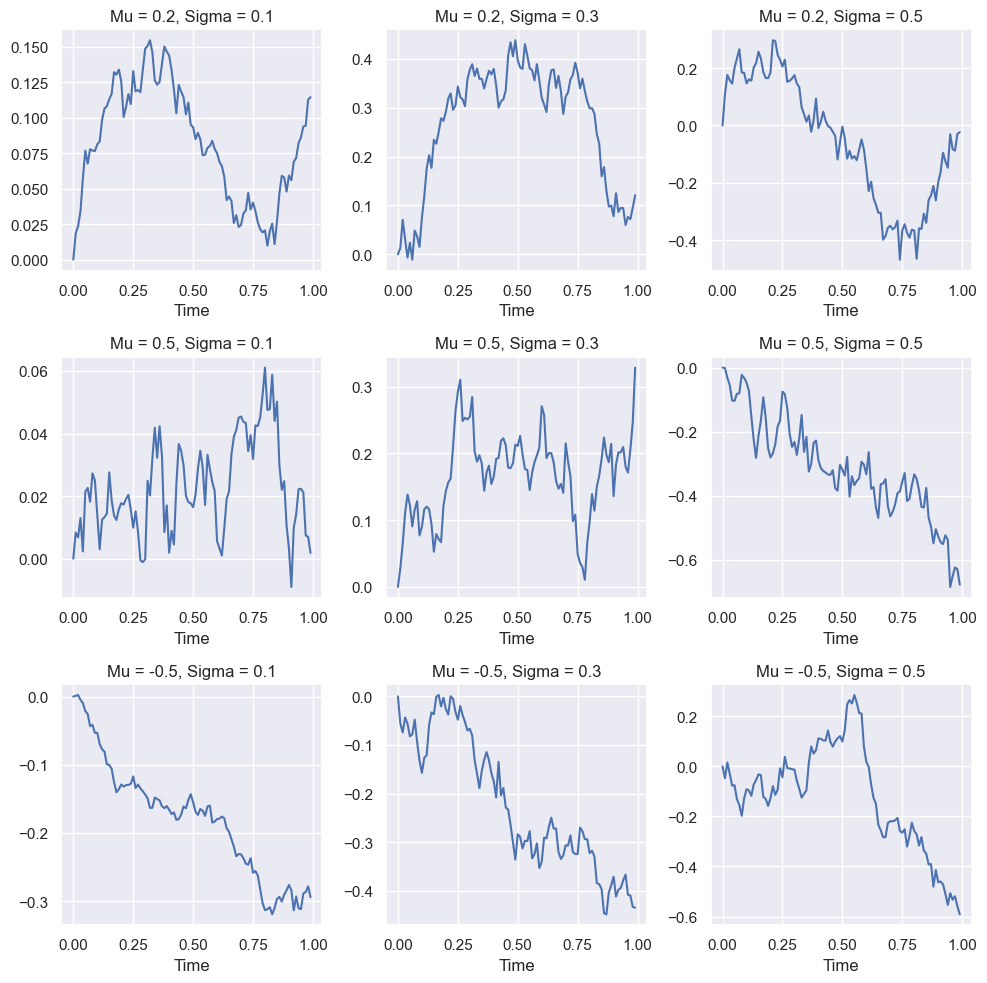

In [12]:
# Define the parameters of the OU process
mean_levels = [0.2, 0.5, -0.5]
volatilities = [0.1, 0.3, 0.5]
theta = 0.5
dt = 0.01
T = 1
x0 = 0

# Set the random seed for reproducibility
np.random.seed(0)

# Create an array of time steps
timesteps = np.arange(0, T, dt)

# Create a figure to plot the OU processes
fig, axs = plt.subplots(len(mean_levels), len(volatilities), figsize=(10, 10))

# Loop over the parameter combinations
for i, mean_level in enumerate(mean_levels):
    for j, volatility in enumerate(volatilities):
        # Create an array to store the sample path of the OU process
        x = np.zeros_like(timesteps)
        x[0] = x0

        # Loop over the time steps and simulate the process
        for k in range(1, len(timesteps)):
            dx = theta * (mean_level - x[k-1]) * dt + volatility * np.sqrt(dt) * np.random.normal()
            x[k] = x[k-1] + dx

        # Plot the sample path
        axs[i, j].plot(timesteps, x)
        axs[i, j].set_title(f"Mu = {mean_level}, Sigma = {volatility}")
        axs[i, j].set_xlabel("Time")

# Adjust the layout of the figure
plt.tight_layout()
plt.show()


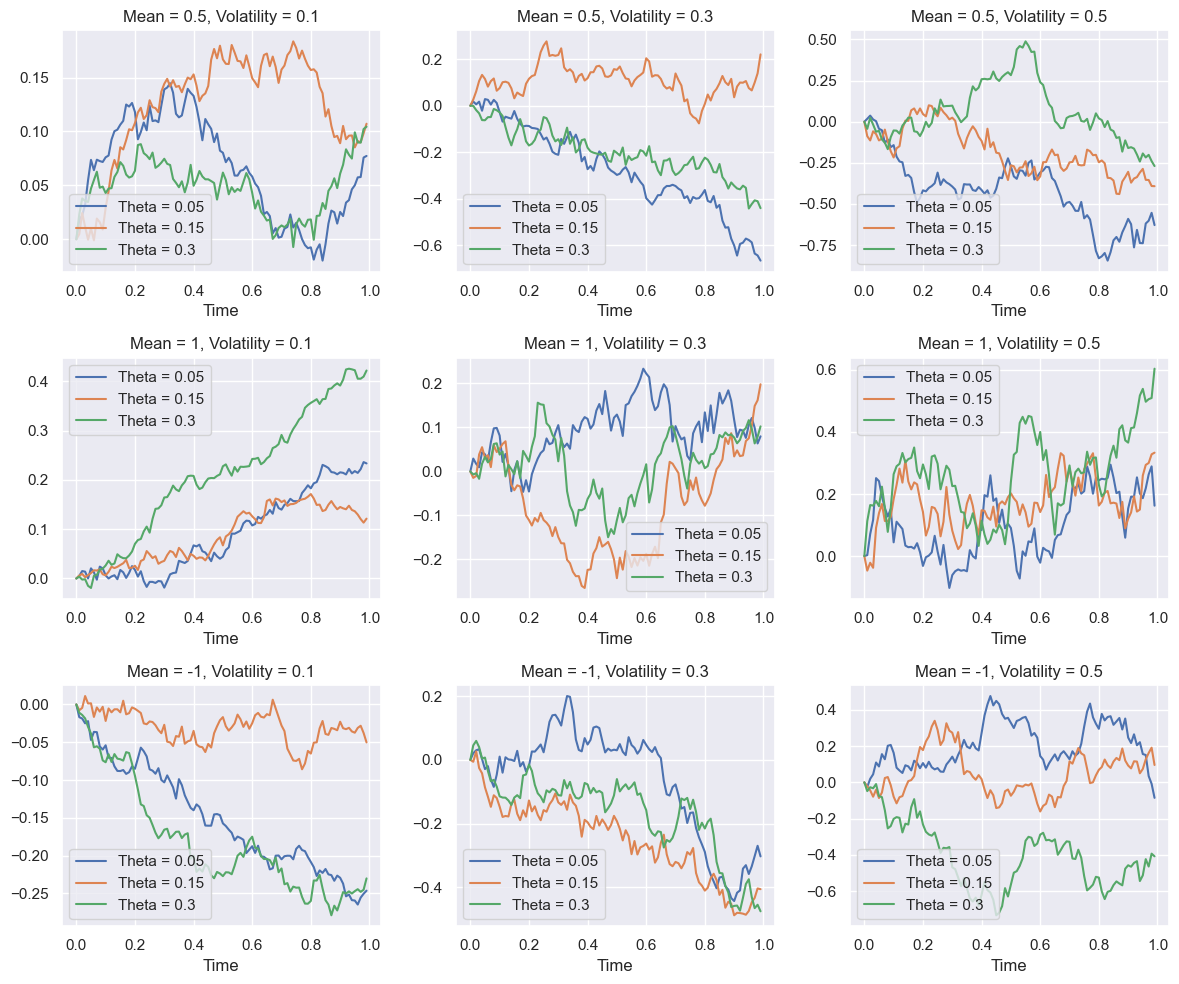

In [13]:
# Define the parameters of the OU process
mean_levels = [0.5, 1, -1]
volatilities = [0.1, 0.3, 0.5]
thetas = [0.05, 0.15, 0.3]
dt = 0.01
T = 1
x0 = 0

# Set the random seed for reproducibility
np.random.seed(0)

# Create an array of time steps
timesteps = np.arange(0, T, dt)

# Create a figure to plot the OU processes
fig, axs = plt.subplots(len(mean_levels), len(volatilities), figsize=(12, 10))

# Loop over the parameter combinations
for i, mean_level in enumerate(mean_levels):
    for j, volatility in enumerate(volatilities):
        for k, theta in enumerate(thetas):
            # Create an array to store the sample path of the OU process
            x = np.zeros_like(timesteps)
            x[0] = x0

            # Loop over the time steps and simulate the process
            for l in range(1, len(timesteps)):
                dx = theta * (mean_level - x[l-1]) * dt + volatility * np.sqrt(dt) * np.random.normal()
                x[l] = x[l-1] + dx

            # Plot the sample path
            axs[i, j].plot(timesteps, x, label=f"Theta = {theta}")
            axs[i, j].set_title(f"Mean = {mean_level}, Volatility = {volatility}")
            axs[i, j].set_xlabel("Time")

        # Add a legend to the subplot
        axs[i, j].legend()

# Adjust the layout of the figure
plt.tight_layout()
plt.show()


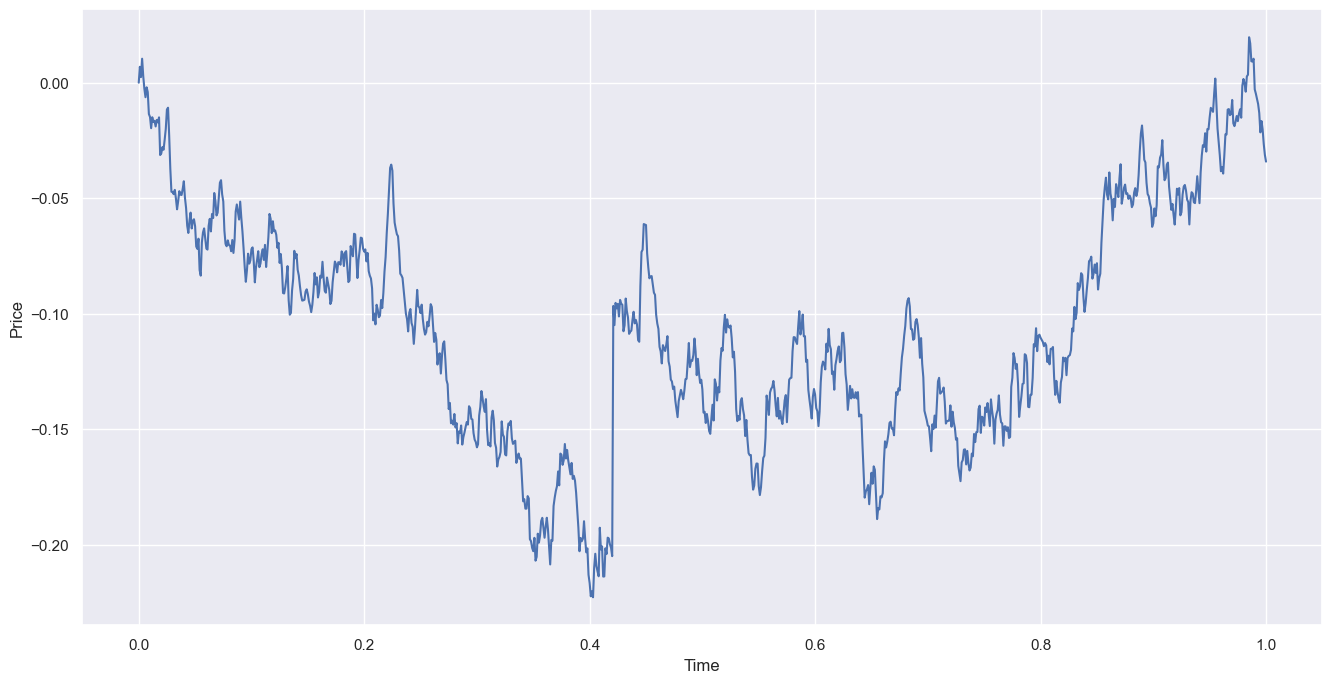

<Figure size 1600x800 with 0 Axes>

In [14]:
def levy_jump_diffusion_process(T, N, mu, sigma, lam, alpha, beta):
    dt = T/N
    time = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    Z = np.random.normal(size=N+1)
    for i in range(1, N+1):
        W[i] = W[i-1] + np.sqrt(dt)*Z[i]
    Nt = np.random.poisson(lam*dt, size=N+1)
    S = np.zeros(N+1)
    for i in range(1, N+1):
        J = 0
        for j in range(Nt[i]):
            Y = np.random.normal(loc=alpha, scale=beta)
            J += Y
        S[i] = S[i-1] + mu*dt + sigma*Z[i]*np.sqrt(dt) + J
    return (time, S)

# Parameters
T = 1
N = 1000
mu = 0.1
sigma = 0.2
lam = 1
alpha = 0.05
beta = 0.1

# Generate paths and plot
time, S = levy_jump_diffusion_process(T, N, mu, sigma, lam, alpha, beta)
plt.plot(time, S)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
plt.tight_layout()


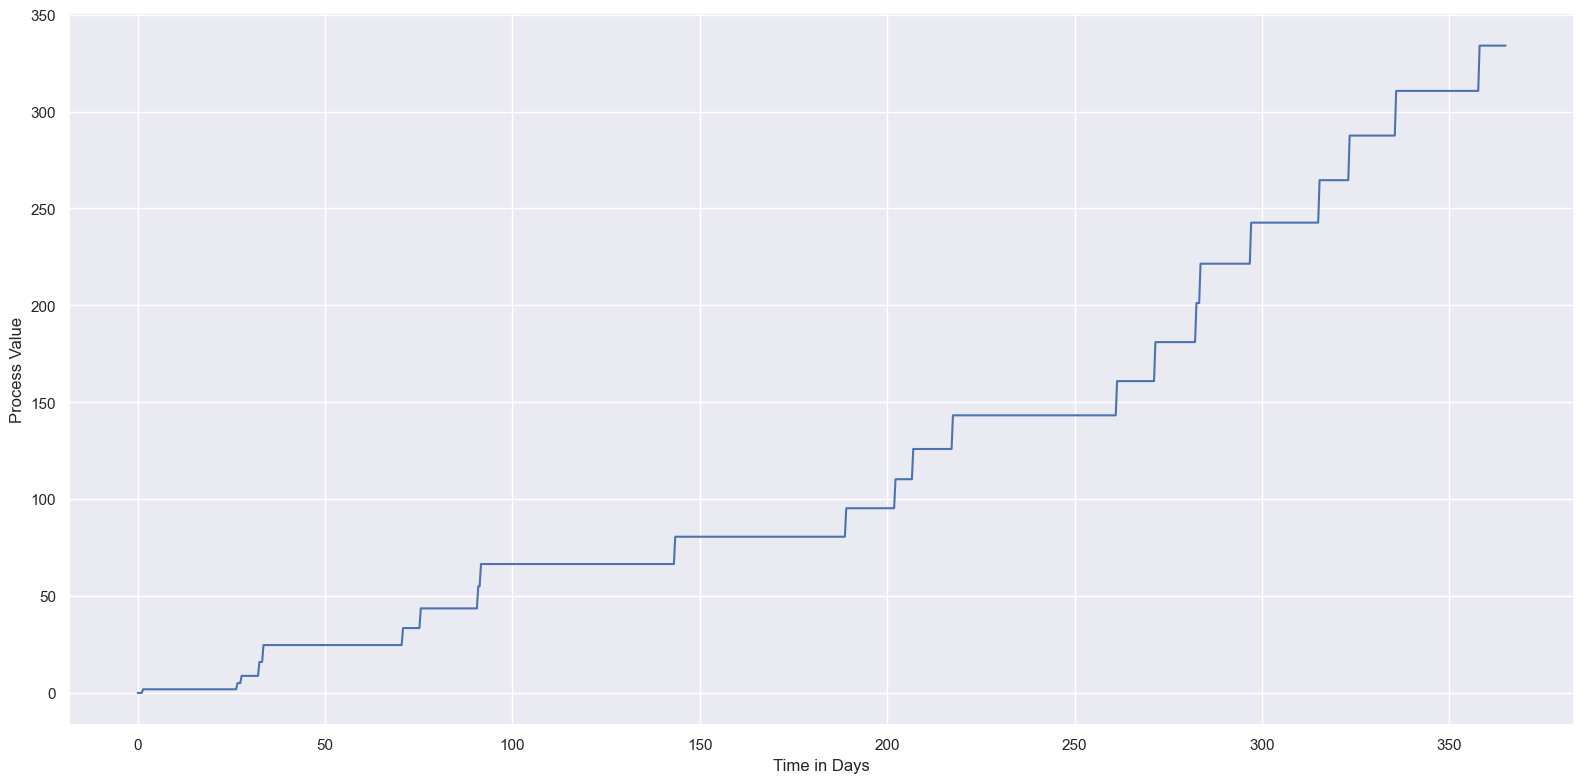

In [15]:
# Define parameters
T = 365 # number of days
N = 1000  # number of time steps
lam = 0.05  # intensity rate
alpha = 1  # jump size intensity rate

# Generate time grid
dt = T / N
t = np.arange(0, T+dt, dt)

# Generate Poisson process
poisson = np.random.poisson(lam*dt, N)
poisson_cumsum = np.cumsum(poisson)

# Generate exponential jump sizes
jumps = np.random.exponential(scale=1/alpha, size=np.sum(poisson))
jumps_cumsum = np.cumsum(jumps)

# Generate compound Poisson process
process = np.zeros_like(t)
for i in range(len(poisson)):
    if poisson[i] > 0:
        process[i:] += jumps_cumsum[poisson_cumsum[i-1]:poisson_cumsum[i]]

# Plot sample path
plt.plot(t, process)
plt.xlabel('Time in Days')
plt.ylabel('Process Value')
plt.tight_layout()
plt.show()

    


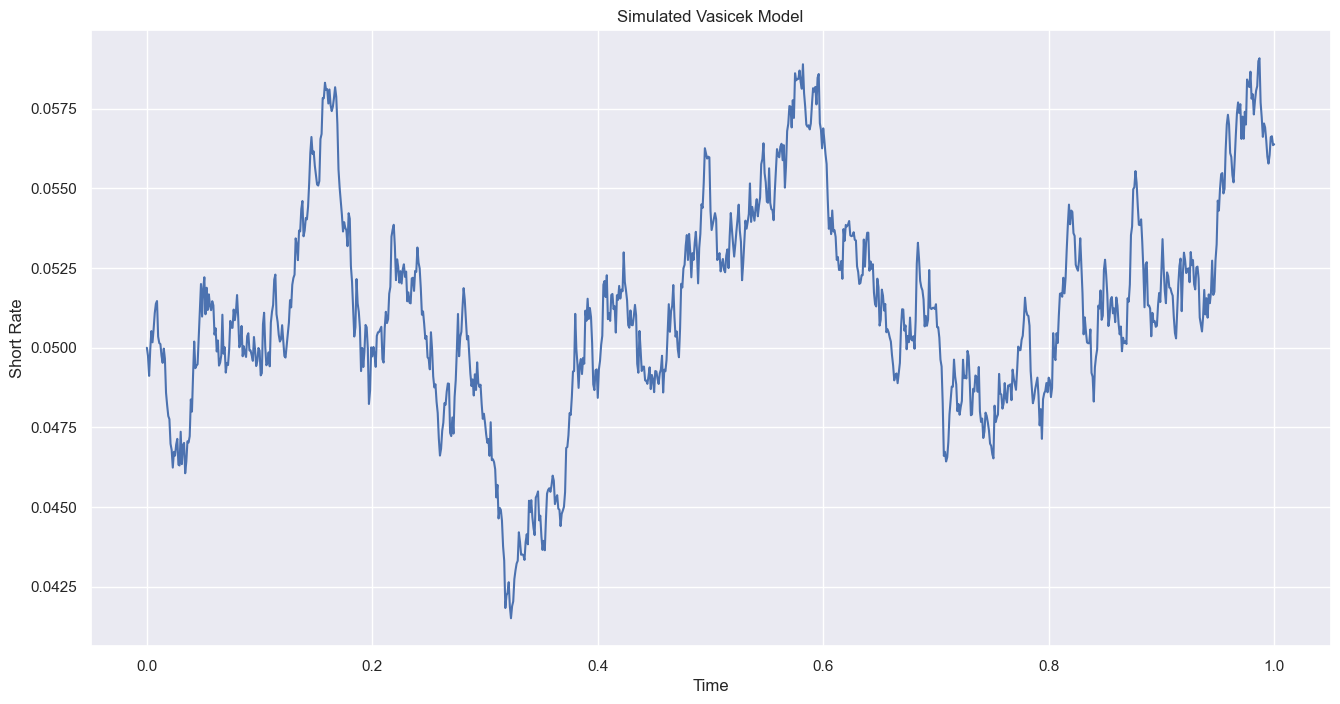

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the Vasicek model
r0 = 0.05 # initial short rate
theta = 0.07 # long-term mean rate
kappa = 0.1 # speed of mean reversion
sigma = 0.02 # short rate volatility

# Simulation settings
T = 1.0 # time horizon
N = 1000 # number of time steps
dt = T/N # size of time step

# Simulate the Vasicek model using Euler's method
r = np.zeros(N+1)
r[0] = r0
for i in range(1, N+1):
    dr = kappa*(theta-r[i-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
    r[i] = r[i-1] + dr

# Plot the simulated short rates
plt.plot(np.linspace(0, T, N+1), r)
plt.xlabel('Time')
plt.ylabel('Short Rate')
plt.title('Simulated Vasicek Model')
plt.show()


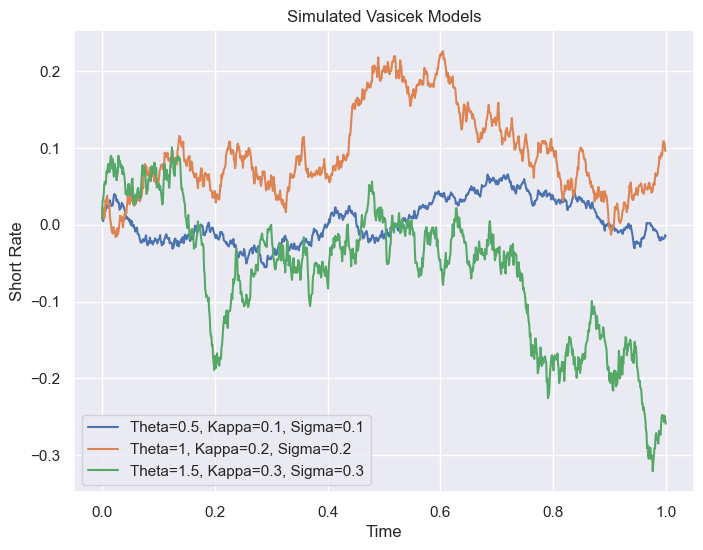

In [17]:
# Define function to simulate Vasicek model
def simulate_vasicek(r0, theta, kappa, sigma, T=1.0, N=1000):
    dt = T/N
    r = np.zeros(N+1)
    r[0] = r0
    for i in range(1, N+1):
        dr = kappa*(theta-r[i-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        r[i] = r[i-1] + dr
    return r

# Define parameters for each simulation
r0 = 0.01
theta_vals = [0.5, 1, 1.5]
kappa_vals = [0.1, 0.2, 0.3]
sigma_vals = [0.1, 0.2, 0.3]

# Simulate Vasicek models with different parameters
plt.figure(figsize=(8,6))
plt.xlabel('Time')
plt.ylabel('Short Rate')
plt.title('Simulated Vasicek Models')

for i in range(len(theta_vals)):
    r = simulate_vasicek(r0, theta_vals[i], kappa_vals[i], sigma_vals[i])
    plt.plot(np.linspace(0, 1, len(r)), r, label=f'Theta={theta_vals[i]}, Kappa={kappa_vals[i]}, Sigma={sigma_vals[i]}')

plt.legend()
plt.show()
